# 1.	Introduction 

The IBM Data Science Professional certificate course on Coursera concludes with a Capstone Project. This project is about using data science toolset on a real-life problem and demonstrating the creation of value by applying the learned skills. This report presents the capstone project which is done for picking right location for a new restaurant in Berlin.






# 2.	Problem Definition

a.	The Problem
 Berlin is the capital and largest city of Germany by both area and population. In an competitive field, Berlin is making a strong claim to be the world’s premier city. The German capital can lay claim to reasonable rent, an English-speaking population, thriving businesses, great food and nightlife, and a burgeoning startup scene.
                                    In here, business problem is to picking up a best location to open a new restaurant in Berlin. Taking the population, price level at which the restaurant will operate. The intent is to find an optimal location in an area which is easily accessible for tourists and for wealthier local citizens as well.




b.	Assumptions and business logic

The assumption behind the analysis is that , unsupervised machine learning can be used to create clusters of neighborhoods of Berlin that will give with a list of areas for consideration for the restaurant. The intent is that restaurant to be situated close to one of the gastronomical centers and touristic hotspots.


c.	Audience
This analysis could be useful for group of market players and business people who have idea to open new restaurant in berlin and also tourists to take idea about restaurants around Berlin


d.	Data
To perform this analysis , following data required:
1.	List of the boroughs and neighborhoods of Berlin
2.	Geo-coordinates of the boroughs in Berlin
3.	Top  venues of boroughs
List of boroughs will be obtained from Wikipedia.
(https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin)

Geo-coordinates of boroughs will be obtained with the help of the geocoder tool in the notebook.
Top venues data will be obtained from Foursquare through an API


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library


print('Libraries imported.')

Libraries imported.




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Senura96\Anaconda3\envs\pycaret2.1

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       h5b45459_0         183 KB  conda-forge
    certifi-2020.11.8          |   py36ha15d459_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         333 KB

The following packages will be UPDATED:

  ca-certificates                      2020.6.20-hecda079_0 --> 2020.11.8-h5b45459_0
  certifi                          2020.6.20-py36hd36e781_2 --> 2020.11.8-py36ha15d459_0




certifi-2020.11.8    | 151 KB    |            |   0% 
certifi-2020.11.8    | 151 KB    | #          |  11% 
certifi-2020.11.8    | 151 KB    | ######3    |  64% 
certifi-2020.11.8  



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [5]:
!conda update -n base -c defaults conda 

^C


In [ ]:
#Getting borough list of wikipedia from csv

In [21]:
boroughs = pd.read_csv('C:/Users/Senura96/Coursera_Capstone/Boroughs.csv')

In [22]:
boroughs

,New borough name,Old borough names,Area,Population
0,Mitte,"Mitte, Tiergarten, Wedding",39.74 km2 (15.3 sq mi),"320,420"
1,Friedrichshain-Kreuzberg,"Friedrichshain, Kreuzberg",20.16 km2 (7.8 sq mi),"256,419"
2,Pankow,"Prenzlauer Berg, Weißensee, Pankow",103.07 km2 (39.8 sq mi),"348,412"
3,Charlottenburg-Wilmersdorf,"Charlottenburg, Wilmersdorf",64.72 km2 (25.0 sq mi),"315,054"
4,Spandau,Spandau (unchanged),91.91 km2 (35.5 sq mi),"225,856"
5,Steglitz-Zehlendorf,"Steglitz, Zehlendorf",102.50 km2 (39.6 sq mi),"288,285"
6,Tempelhof-Schöneberg,"Tempelhof, Schöneberg",53.09 km2 (20.5 sq mi),"335,171"
7,Neukölln,Neukölln (unchanged),44.93 km2 (17.3 sq mi),"306,214"
8,Treptow-Köpenick,"Treptow, Köpenick",168.43 km2 (65.0 sq mi),"233,923"
9,Marzahn-Hellersdorf,"Marzahn, Hellersdorf",61.74 km2 (23.8 sq mi),"252,602"


In [23]:
boroughs.shape

(12, 4)

In [25]:
# define the dataframe columns
column_names = [ 'Borough', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighbors = pd.DataFrame(columns=column_names)

neighbors

,Borough,Latitude,Longitude


In [30]:
borough= boroughs['New borough name']
location = None
latitude = None
longitude = None

for data in range(0, len(boroughs)):
    dt = borough[data]
    
    
    geolocator = Nominatim(user_agent="new-my-application")
    location = geolocator.geocode('{}'.format(dt))
    latitude = location.latitude
    longitude = location.longitude

    neighbors = neighbors.append({ 'Borough':dt,'Latitude': location.latitude,'Longitude': location.longitude}, ignore_index=True)

In [ ]:
# These are the boroughs of berlin with coordinates.

In [33]:
neighbors

,Borough,Latitude,Longitude
0,Mitte,52.517690,13.402376
1,Friedrichshain-Kreuzberg,52.506862,13.450642
2,Pankow,52.597917,13.435316
3,Charlottenburg-Wilmersdorf,52.507856,13.263952
4,Spandau,52.535788,13.197792
5,Steglitz-Zehlendorf,52.429205,13.229974
6,Tempelhof-Schöneberg,52.440603,13.373703
7,Neukölln,52.481150,13.435350
8,Treptow-Köpenick,52.417893,13.600185
9,Marzahn-Hellersdorf,52.522523,13.587663


# Mapping Berlin with 12 Boroughs

In [18]:
#finding geodata for Berlin

In [38]:
geolocator = Nominatim(user_agent="new-my-application")
location = geolocator.geocode('Berlin')
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of Berlin are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Berlin are 52.5015217, 13.4025498.


In [37]:

map_berlin = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(neighbors['Latitude'], neighbors['Longitude'], neighbors['Borough']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_budapest)
    
map_berlin

# Exploring the Boroughs of Berlin

In [39]:
#foursquares

In [54]:

CLIENT_ID = 'OY5DDZAYDPMOKEUU2RBTSYNG0KCURHWMN4FPLBD3FON3NKHI' #  Foursquare ID
CLIENT_SECRET = 'CRXMNQKX0Z4MI3UF1QOXUFZEYER4ZKH5C4EATNKQUXFG0NG4' # Foursquare Secret
VERSION = '20201112' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OY5DDZAYDPMOKEUU2RBTSYNG0KCURHWMN4FPLBD3FON3NKHI
CLIENT_SECRET:CRXMNQKX0Z4MI3UF1QOXUFZEYER4ZKH5C4EATNKQUXFG0NG4


# Exploring First Borough

In [41]:
neighbors.loc[0, 'Borough']

'Mitte'

In [42]:
#Getting the borough geo coordinates

In [43]:
neighborhood_latitude = neighbors.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighbors.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighbors.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Mitte are 52.5176896, 13.4023757.


In [44]:
# Getting the top 100 venues that are in Mitte (First borough) within a radius of 1000 meters. This will be obtained from Foursquare.

In [55]:
search_query = 'venues'
radius = 1000
LIMIT = 100
ur = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
ur

'https://api.foursquare.com/v2/venues/explore?&client_id=OY5DDZAYDPMOKEUU2RBTSYNG0KCURHWMN4FPLBD3FON3NKHI&client_secret=CRXMNQKX0Z4MI3UF1QOXUFZEYER4ZKH5C4EATNKQUXFG0NG4&v=20201112&ll=52.5176896,13.4023757&radius=1000&limit=100'

In [56]:

results = requests.get(ur).json()
results

{'meta': {'code': 200, 'requestId': '5fad3315f5f91049c04ba712'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Museumsinsel',
  'headerFullLocation': 'Museumsinsel, Berlin',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 228,
  'suggestedBounds': {'ne': {'lat': 52.52668960900001,
    'lng': 13.417138168336054},
   'sw': {'lat': 52.508689590999985, 'lng': 13.387613231663947}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adcda7cf964a5205f4721e3',
       'name': 'Lustgarten',
       'location': {'address': 'Am Lustgarten',
        'crossStreet': 'Schloßplatz',
        'lat': 52.518469490131785,
        'lng': 13.399454063404399,
        'labeledLatLngs': [{'la

In [58]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [59]:

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Lustgarten,4adcda7cf964a5205f4721e3,Garden,52.518469,13.399454
1,Kuppelumgang Berliner Dom,51838de5498e3fca634679a8,Scenic Lookout,52.518966,13.400981
2,Radisson Blu,4b24db17f964a5202f6a24e3,Hotel,52.519561,13.402857
3,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",4e50ee55483bb7704924391a,Outdoor Sculpture,52.516290,13.405558
4,Designpanoptikum - surreales Museum für indust...,4f42de33e4b0a2bdc6c470ce,Museum,52.516941,13.406072
5,Deutsches Historisches Museum,4adcda83f964a520aa4821e3,History Museum,52.517788,13.396948
6,Buchhandlung Walther König,4c3caf727c1ee21e63ea8c71,Bookstore,52.521301,13.400758
7,Tigertörtchen,4ee917afd5fb86321f2b0297,Cupcake Shop,52.517150,13.407926
8,Neues Museum,4adcda83f964a520b24821e3,History Museum,52.520158,13.397838
9,Nikolaiviertel,4adcda7df964a5206f4721e3,Neighborhood,52.516782,13.406453


In [60]:

#fix the column names

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Lustgarten,4adcda7cf964a5205f4721e3,Garden,52.518469,13.399454
1,Kuppelumgang Berliner Dom,51838de5498e3fca634679a8,Scenic Lookout,52.518966,13.400981
2,Radisson Blu,4b24db17f964a5202f6a24e3,Hotel,52.519561,13.402857
3,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",4e50ee55483bb7704924391a,Outdoor Sculpture,52.516290,13.405558
4,Designpanoptikum - surreales Museum für indust...,4f42de33e4b0a2bdc6c470ce,Museum,52.516941,13.406072
5,Deutsches Historisches Museum,4adcda83f964a520aa4821e3,History Museum,52.517788,13.396948
6,Buchhandlung Walther König,4c3caf727c1ee21e63ea8c71,Bookstore,52.521301,13.400758
7,Tigertörtchen,4ee917afd5fb86321f2b0297,Cupcake Shop,52.517150,13.407926
8,Neues Museum,4adcda83f964a520b24821e3,History Museum,52.520158,13.397838
9,Nikolaiviertel,4adcda7df964a5206f4721e3,Neighborhood,52.516782,13.406453


# Exploring Other Boroughs

In [61]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [63]:

berlin_venues = getNearbyVenues(names=neighbors['Borough'],
                                   latitudes=neighbors['Latitude'],
                                   longitudes=neighbors['Longitude']
                                  )

Mitte
Friedrichshain-Kreuzberg
Pankow
Charlottenburg-Wilmersdorf
Spandau
Steglitz-Zehlendorf
Tempelhof-Schöneberg
Neukölln
Treptow-Köpenick
Marzahn-Hellersdorf
Lichtenberg
Reinickendorf


In [64]:

print(berlin_venues.shape)
berlin_venues.head()

(499, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.51769,13.402376,Lustgarten,52.518469,13.399454,Garden
1,Mitte,52.51769,13.402376,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout
2,Mitte,52.51769,13.402376,Radisson Blu,52.519561,13.402857,Hotel
3,Mitte,52.51769,13.402376,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",52.516290,13.405558,Outdoor Sculpture
4,Mitte,52.51769,13.402376,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum


In [65]:
berlin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Charlottenburg-Wilmersdorf,45,45,45,45,45,45
Friedrichshain-Kreuzberg,100,100,100,100,100,100
Lichtenberg,2,2,2,2,2,2
Marzahn-Hellersdorf,15,15,15,15,15,15
Mitte,100,100,100,100,100,100
Neukölln,100,100,100,100,100,100
Pankow,8,8,8,8,8,8
Reinickendorf,7,7,7,7,7,7
Spandau,64,64,64,64,64,64


# Checking the unique values each borough have

In [67]:
print('There are {} uniques categories.'.format(len(berlin_venues['Venue Category'].unique())))

There are 164 uniques categories.


# Analyzing the Boroughs

In [68]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Neighborhood'] = berlin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,Yoga Studio,Adult Boutique,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Stop,Café,Canal Lock,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Community Center,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Currywurst Joint,Deli / Bodega,Department Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Escape Room,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Stand,Fountain,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hockey Field,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Industrial Estate,Italian Restaurant,Japanese Restaurant,Jazz Club,Karaoke Bar,Korean Restaurant,Kumpir Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Neighborhood,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Poke Place,Pool,Pub,Record Shop,Restaurant,River,Rock Club,Roof Deck,Rooftop Bar,Russian Restaurant,Sandwich Place,Scenic Lookout,Schnitzel Restaurant,Shopping Mall,Skate Park,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Storage Facility,Street Art,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mitte,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [69]:
berlin_grouped = berlin_onehot.groupby('Neighborhood').mean().reset_index()
berlin_grouped

,Neighborhood,Yoga Studio,Adult Boutique,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Stop,Café,Canal Lock,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Community Center,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Currywurst Joint,Deli / Bodega,Department Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Escape Room,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Stand,Fountain,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hockey Field,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Industrial Estate,Italian Restaurant,Japanese Restaurant,Jazz Club,Karaoke Bar,Korean Restaurant,Kumpir Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Nightclub,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Poke Place,Pool,Pub,Record Shop,Restaurant,River,Rock Club,Roof Deck,Rooftop Bar,Russian Restaurant,Sandwich Place,Scenic Lookout,Schnitzel Restaurant,Shopping Mall,Skate Park,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Storage Facility,Street Art,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Charlottenburg-Wilmersdorf,0.00,0.00,0.00,0.00,0.000000,0.00,0.022222,0.000000,0.00,0.00,0.000000,0.000000,0.022222,0.000000,0.000000,0.00,0.00,0.00000,0.00,0.022222,0.00,0.00,0.022222,0.00,0.000000,0.00,0.00,0.00,0.044444,0.111111,0.00,0.00,0.00,0.022222,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.022222,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.022222,0.00,0.00,0.00,0.022222,0.000000,0.000000,0.00,0.00,0.00,0.022222,0.000000,0.00,0.022222,0.022222,0.000000,0.044444,0.00,0.022222,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.022222,0.000000,0.00,0.044444,0.00,0.022222,0.022222,0.00,0.00,0.000000,0.088889,0.022222,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000,0.000000,0.00,0.000000,0.00,0.00000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.022222,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.044444,0.044444,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.022222,0.00,0.022222,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.022222,0.022222,0.000000,0.00,0.022222,0.00,0.00,0.022222,0.022222,0.022222,0.00,0.00,0.000000,0.000000,0.022222,0.00,0.00,0.00000,0.00,0.00
1,Friedrichshain-Kreuzberg,0.00,0.00,0.00,0.01,0.000000,0.01,0.000000,0.000000,0.01,0.02,0.000000,0.000000,0.040000,0.000000,0.000000,0.00,0.01,0.00000,0.00,0.000000,0.00,0.02,0.000000,0.00,0.010000,0.01,0.01,0.00,0.000000,0.030000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.010000,0.000000,0.020000,0.06,0.000000,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.000000,0.01,0.01,0.01,0.010000,0.010000,0.00,0.00,0.00,0.030000,0.010000,0.000000,0.00,0.01,0.00,0.000000,0.000000,0.01,0.000000,0.000000,0.010000,0.010000,0.01,0.000000,0.010000,0.010000,0.010000,0.000000,0.00,0.000000,0.000000,0.020000,0.01,0.020000,0.01,

# Let's see each neighborhood along with the top 5 most common venues

In [71]:
num_top_venues = 5

for hood in berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Charlottenburg-Wilmersdorf----
                venue  freq
0                Café  0.11
1  Italian Restaurant  0.09
2               Hotel  0.04
3         Pizza Place  0.04
4               Plaza  0.04


----Friedrichshain-Kreuzberg----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.06
1                    Coffee Shop  0.06
2      Middle Eastern Restaurant  0.04
3                      Nightclub  0.04
4                            Bar  0.04


----Lichtenberg----
             venue  freq
0           Hostel   0.5
1    Historic Site   0.5
2      Yoga Studio   0.0
3      Opera House   0.0
4  Motorcycle Shop   0.0


----Marzahn-Hellersdorf----
           venue  freq
0    Supermarket  0.47
1  Metro Station  0.13
2      Drugstore  0.13
3           Lake  0.07
4  Bowling Alley  0.07


----Mitte----
            venue  freq
0           Hotel  0.13
1  History Museum  0.06
2     Art Gallery  0.06
3     Coffee Shop  0.04
4           Plaza  0.04


----Neukölln----
         

In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [74]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,Café,Italian Restaurant,Hotel,German Restaurant,Bus Stop,Plaza,Pizza Place,Drugstore,Rooftop Bar,Bowling Alley
1,Friedrichshain-Kreuzberg,Vegetarian / Vegan Restaurant,Coffee Shop,Bar,Nightclub,Middle Eastern Restaurant,Falafel Restaurant,Café,Music Venue,Hotel,Thai Restaurant
2,Lichtenberg,Hostel,Historic Site,Dog Run,Falafel Restaurant,Exhibit,Escape Room,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant
3,Marzahn-Hellersdorf,Supermarket,Drugstore,Metro Station,Bowling Alley,Shopping Mall,Lake,Trail,Donut Shop,Falafel Restaurant,Exhibit
4,Mitte,Hotel,Art Gallery,History Museum,Plaza,Coffee Shop,Museum,Restaurant,Bookstore,Ice Cream Shop,Café


# Clusteing Neighbourhoods


For clustering, K-means method will be applied. To be able to select the optimal number of clusters, the silhouette score will be used.

First, let's find out the optimal number of clusters. For that, we will create a graph of the silhouette scores.


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [87]:

max_range = 12

berlin_grouped_clustering = berlin_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = berlin_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

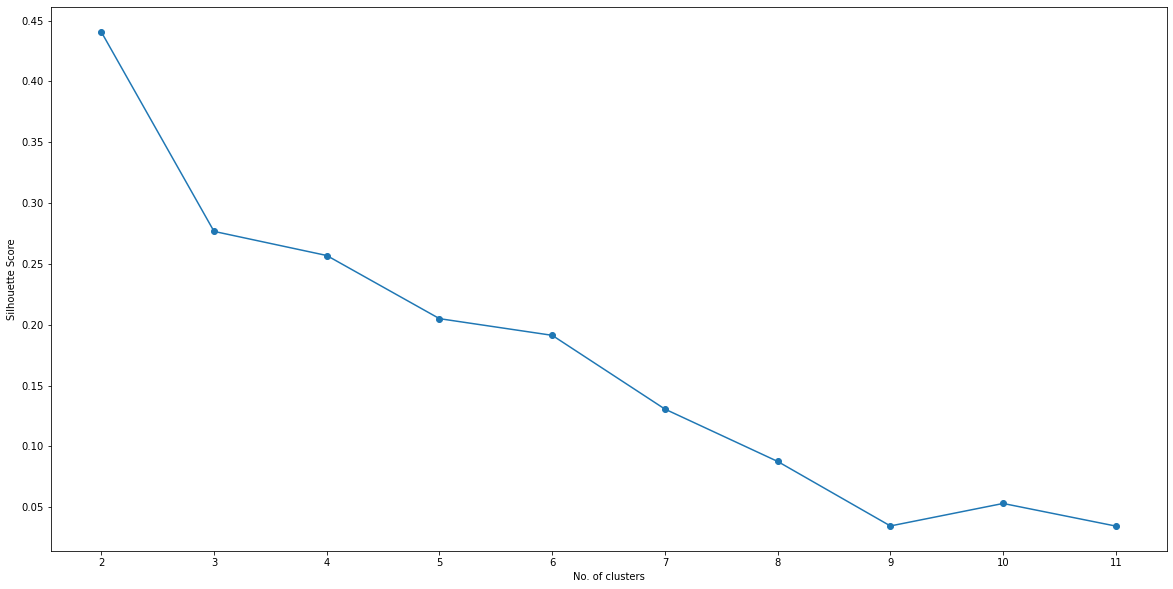

In [88]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")


Based on this graph, we can see that the optimal number of clusters is 2.

Now let's run the K-means clustering with the optimal number of clusters, which is 2.

In [91]:
# run k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [92]:
#Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [95]:

neighbors.rename(columns={'Borough':'Neighborhood'}, inplace=True)
neighbors.head()

,Neighborhood,Latitude,Longitude
0,Mitte,52.517690,13.402376
1,Friedrichshain-Kreuzberg,52.506862,13.450642
2,Pankow,52.597917,13.435316
3,Charlottenburg-Wilmersdorf,52.507856,13.263952
4,Spandau,52.535788,13.197792


In [99]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = neighbors

# merge budapest_grouped with budapest_data to add latitude/longitude for each neighborhood
berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

berlin_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mitte,52.517690,13.402376,0,Hotel,Art Gallery,History Museum,Plaza,Coffee Shop,Museum,Restaurant,Bookstore,Ice Cream Shop,Café
1,Friedrichshain-Kreuzberg,52.506862,13.450642,0,Vegetarian / Vegan Restaurant,Coffee Shop,Bar,Nightclub,Middle Eastern Restaurant,Falafel Restaurant,Café,Music Venue,Hotel,Thai Restaurant
2,Pankow,52.597917,13.435316,0,Tram Station,Supermarket,Light Rail Station,Lake,Asian Restaurant,Bus Stop,Donut Shop,Falafel Restaurant,Exhibit,Escape Room
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,0,Café,Italian Restaurant,Hotel,German Restaurant,Bus Stop,Plaza,Pizza Place,Drugstore,Rooftop Bar,Bowling Alley
4,Spandau,52.535788,13.197792,0,Bakery,Supermarket,Drugstore,Clothing Store,Hotel,Ice Cream Shop,Fast Food Restaurant,Italian Restaurant,Mobile Phone Shop,Pizza Place
5,Steglitz-Zehlendorf,52.429205,13.229974,0,Italian Restaurant,Bus Stop,History Museum,Bar,Park,Plaza,Chocolate Shop,Pub,Café,Liquor Store
6,Tempelhof-Schöneberg,52.440603,13.373703,0,Supermarket,Bakery,Steakhouse,Industrial Estate,Drugstore,Brewery,Farmers Market,Fast Food Restaurant,Restaurant,Motorcycle Shop
7,Neukölln,52.481150,13.435350,0,Coffee Shop,Bar,Café,Cocktail Bar,Bistro,German Restaurant,Italian Restaurant,Turkish Restaurant,Indie Movie Theater,Dive Bar
8,Treptow-Köpenick,52.417893,13.600185,0,Gastropub,Plaza,Tram Station,Lake,River,Beach,Dive Bar,Escape Room,Dumpling Restaurant,Drugstore
9,Marzahn-Hellersdorf,52.522523,13.587663,0,Supermarket,Drugstore,Metro Station,Bowling Alley,Shopping Mall,Lake,Trail,Donut Shop,Falafel Restaurant,Exhibit


In [100]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Neighborhood'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine the Clusters

In [101]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mitte,Art Gallery,History Museum,Plaza,Coffee Shop,Museum,Restaurant,Bookstore,Ice Cream Shop,Café
1,Friedrichshain-Kreuzberg,Coffee Shop,Bar,Nightclub,Middle Eastern Restaurant,Falafel Restaurant,Café,Music Venue,Hotel,Thai Restaurant
2,Pankow,Supermarket,Light Rail Station,Lake,Asian Restaurant,Bus Stop,Donut Shop,Falafel Restaurant,Exhibit,Escape Room
3,Charlottenburg-Wilmersdorf,Italian Restaurant,Hotel,German Restaurant,Bus Stop,Plaza,Pizza Place,Drugstore,Rooftop Bar,Bowling Alley
4,Spandau,Supermarket,Drugstore,Clothing Store,Hotel,Ice Cream Shop,Fast Food Restaurant,Italian Restaurant,Mobile Phone Shop,Pizza Place
5,Steglitz-Zehlendorf,Bus Stop,History Museum,Bar,Park,Plaza,Chocolate Shop,Pub,Café,Liquor Store
6,Tempelhof-Schöneberg,Bakery,Steakhouse,Industrial Estate,Drugstore,Brewery,Farmers Market,Fast Food Restaurant,Restaurant,Motorcycle Shop
7,Neukölln,Bar,Café,Cocktail Bar,Bistro,German Restaurant,Italian Restaurant,Turkish Restaurant,Indie Movie Theater,Dive Bar
8,Treptow-Köpenick,Plaza,Tram Station,Lake,River,Beach,Dive Bar,Escape Room,Dumpling Restaurant,Drugstore
9,Marzahn-Hellersdorf,Drugstore,Metro Station,Bowling Alley,Shopping Mall,Lake,Trail,Donut Shop,Falafel Restaurant,Exhibit


In [102]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 1, berlin_merged.columns[[0] + list(range(5, berlin_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Lichtenberg,Historic Site,Dog Run,Falafel Restaurant,Exhibit,Escape Room,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant


# Conclusion

By looking at the cluster data, we can see that cluster 0 is the one that we are the most interested in.
Based on that, we can advise the restaurant owner to consider the districts from this cluster as the potential location for the new restaurant.